In [309]:
import skimage
%matplotlib inline
from skimage import io
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import ndimage

import pywt
from skimage import data, img_as_float
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage.util.shape import view_as_blocks

#added

from skimage import color
from sklearn.cluster import KMeans

from sklearn.utils import shuffle

from skimage import segmentation

In [4]:
rgb_img = io.imread('dog.png')
lab_img = color.rgb2lab(rgb_img)

In [5]:
X = lab_img.reshape((lab_img.shape[0]*lab_img.shape[1],3))

In [6]:
#slow version
#  km = KMeans(n_clusters = 200)  
#  km.fit(X)

In [184]:
#faster version
sample = shuffle(X, random_state=0)[:5000]
km = KMeans(n_clusters =50)
km.fit(sample)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

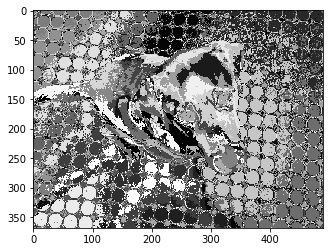

In [185]:
labels = km.predict(X)
np.shape(labels)
Z = labels.reshape((lab_img.shape[0],lab_img.shape[1]))   ## back to (W,H)-Format
plt.imshow(Z, cmap="gray")

In [186]:
## Task 7.1

def create_image(centers, labels2, w, h):
    image = np.zeros((h, w, 3))
    
    for i in range(h): 
        for j in range(w):
            for h in range(3):
                image[i][j][h]= centers[labels2[i][j]][h]
    
    return image

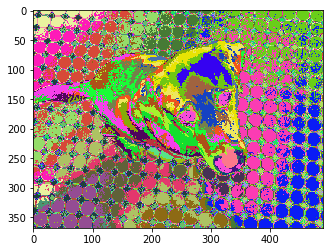

In [187]:
centers = km.cluster_centers_

width = lab_img.shape[1]
height = lab_img.shape[0]

back2color_lab = create_image(centers, Z,width,height)

plt.imshow(back2color_lab)

In [188]:
back2color_rgb = color.lab2rgb(back2color_lab)

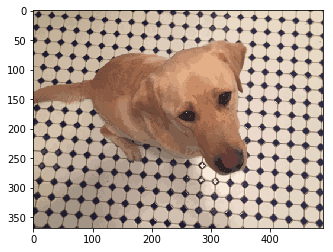

In [189]:
plt.imshow(back2color_rgb)

In [290]:
#coordinates = np.zeros((X.shape[0],2))
for i in range(width*height):
    coordinates[i][0] = int( i / (width))
    coordinates[i][1] = i % width
coordinates = coordinates.astype(int)  
coordinates

array([[  0,   0],
       [  0,   1],
       [  0,   2],
       ..., 
       [367, 487],
       [367, 488],
       [367, 489]])

In [291]:
coordinates[489] # passt

array([  0, 489])

In [292]:
coordinates[490] # passt auch Array sollte richtig angelegt sein 

array([1, 0])

In [293]:
Y = np.concatenate((X,coordinates), axis = 1)

In [298]:
Y # concationation done

array([[  67.51639279,    0.6779458 ,   15.89341143,    0.        ,    0.        ],
       [  66.96606854,    1.61867582,   15.68001936,    0.        ,    1.        ],
       [  67.34012642,    1.6122452 ,   15.66152935,    0.        ,    2.        ],
       ..., 
       [  79.14981437,    1.73852709,   14.11864522,  367.        ,  487.        ],
       [  86.22526055,    1.38875942,   12.11053124,  367.        ,  488.        ],
       [  85.5132653 ,    1.39491363,   12.13256428,  367.        ,  489.        ]])

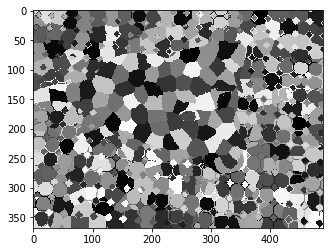

In [306]:
sample = shuffle(Y, random_state=0)[:5000]
km2 = KMeans(n_clusters =400)        # Number of Clusters
km2.fit(sample)

labels = km2.predict(Y)
np.shape(labels)
Z = labels.reshape((lab_img.shape[0],lab_img.shape[1]))   ## back to (W,H)-Format
plt.imshow(Z, cmap="gray")

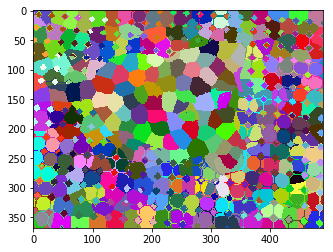

In [307]:
centers = km2.cluster_centers_

width = lab_img.shape[1]
height = lab_img.shape[0]

back2color_lab = create_image(centers, Z,width,height)

plt.imshow(back2color_lab)

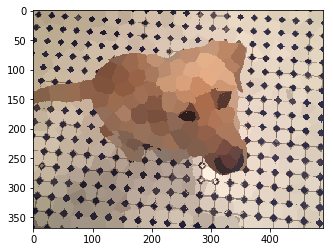

In [308]:
back2color_rgb = color.lab2rgb(back2color_lab)
plt.imshow(back2color_rgb)

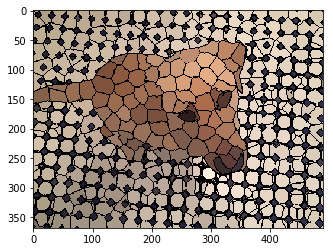

In [323]:
plt.imshow(
    skimage.segmentation.mark_boundaries(
        back2color_rgb,
        labels.reshape((back2color_rgb.shape[0],back2color_rgb.shape[1])),
        color=(0,0,0)))